#  Ensemble Learning - Boosting

**Boosting** is an ensemble technique that combines multiple weak learners sequentially to form a strong predictor. Each new model is trained to correct the errors made by the previous ones.

## 🧩 How It Works

1. Train a base model on the training data.
2. Evaluate the errors and adjust weights to focus on harder cases.
3. Train the next model to correct those errors.
4. Repeat the process and combine all models for final prediction.

**Popular algorithms**: AdaBoost, Gradient Boosting, XGBoost, LightGBM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
sns.set(style='whitegrid')

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
dt_stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` wa

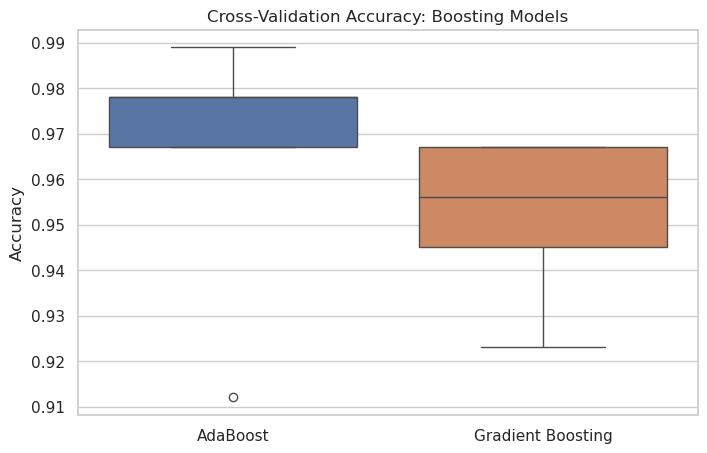

In [4]:
models = {
    'AdaBoost': ada_clf,
    'Gradient Boosting': gb_clf
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = scores

# Plot CV comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=list(cv_results.values()))
plt.xticks(ticks=range(len(cv_results)), labels=cv_results.keys())
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy: Boosting Models')
plt.show()

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9737


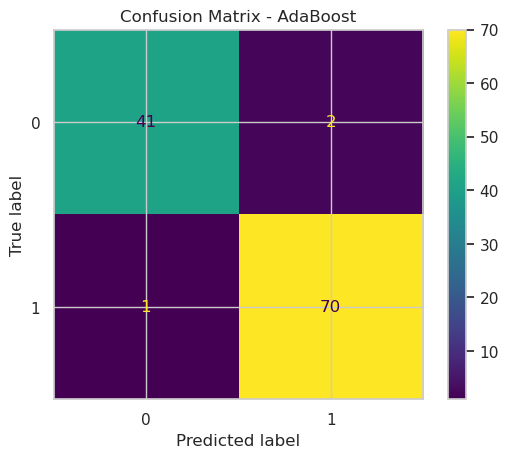

In [5]:
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
ConfusionMatrixDisplay.from_estimator(ada_clf, X_test, y_test)
plt.title('Confusion Matrix - AdaBoost')
plt.show()

Gradient Boosting Accuracy: 0.9561


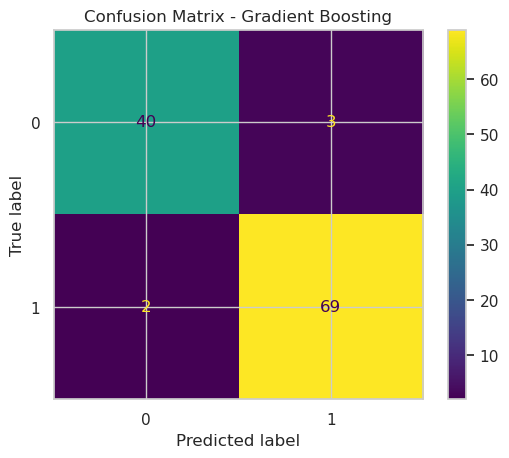

In [6]:
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## ✅ Conclusion

Boosting focuses on improving accuracy by reducing bias and sequentially correcting errors made by earlier models.

- **AdaBoost** is good for interpretable and fast learners.
- **Gradient Boosting** offers better performance and flexibility.

For large datasets, consider optimized versions like **XGBoost**, **LightGBM**, or **CatBoost**.

## 🚀 Advanced Boosting Variant: XGBoost

[XGBoost](https://xgboost.ai) is an optimized gradient boosting algorithm designed for performance and efficiency.
- Handles missing values internally
- Parallel computation
- Regularization to reduce overfitting

XGBoost Accuracy: 0.9561


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


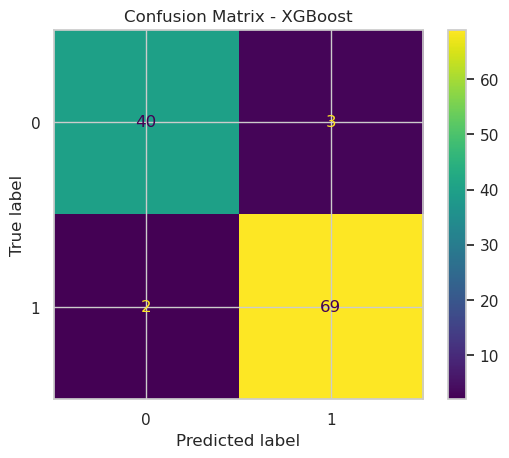

In [7]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)
plt.title('Confusion Matrix - XGBoost')
plt.show()

## 🔧 Hyperparameter Tuning Tips

For Gradient Boosting and XGBoost, consider tuning:
- `n_estimators`: Number of boosting rounds
- `learning_rate`: Shrinks the contribution of each tree
- `max_depth`: Depth of trees (complexity)
- `subsample`: Fraction of data to train each tree (helps regularize)
- `colsample_bytree`: Fraction of features to use per tree (XGBoost only)
- `gamma`, `reg_alpha`, `reg_lambda`: Regularization terms (XGBoost only)

## 📉 Visualizing Boosting Iterations

We can visualize how the test loss evolves over the boosting rounds using staged predictions from `GradientBoostingClassifier`.

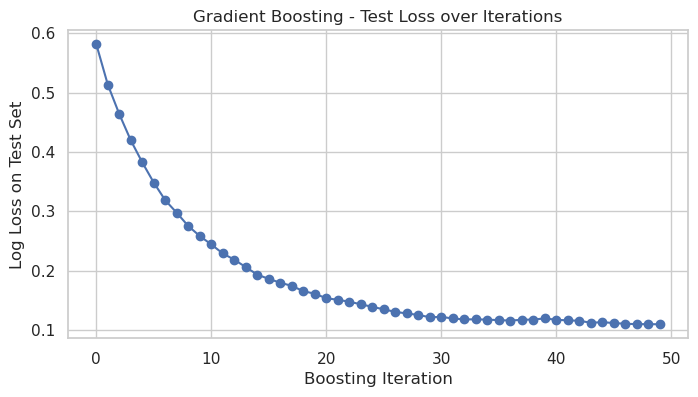

In [8]:
from sklearn.metrics import log_loss

staged_scores = []
for y_proba in gb_clf.staged_predict_proba(X_test):
    staged_scores.append(log_loss(y_test, y_proba))

plt.figure(figsize=(8, 4))
plt.plot(staged_scores, marker='o')
plt.xlabel('Boosting Iteration')
plt.ylabel('Log Loss on Test Set')
plt.title('Gradient Boosting - Test Loss over Iterations')
plt.grid(True)
plt.show()